In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
import scipy.stats
from sklearn.metrics import accuracy_score
np.set_printoptions(suppress=True)

In [2]:
def genData(numPoints):
    x = np.zeros(shape=(numPoints, 3))
    y = np.zeros(shape=numPoints)
    
    x[:,0] = 1
    #x[:,1] = [i for i in range(numPoints)]
    x[:,1] = np.random.uniform(0, 3, size = numPoints)
    x[:,2] = np.random.uniform(0, 3, size = numPoints)


    
    for i in range(0, numPoints): y[i] =  1/(1 + np.exp( - (-3 + (x[i][1]) + (x[i][2]))))
    #for i in range(0, numPoints): y[i] =  1/(1 + np.exp( - (-3 + (x[i][1]))))

    
    y = np.array([1 if i > 0.5 else 0 for i in y])
    return x, y

In [3]:
x,y = (genData(50))
#y_temp = np.array([1 if i > 0.5 else 0 for i in y])

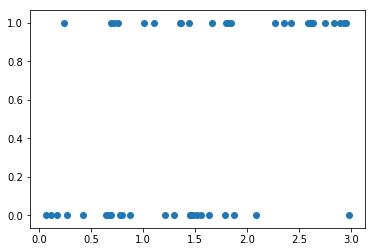

In [4]:
plt.scatter(x[:,1], y)

In [5]:
def gradientDescent(x, y, theta, alpha, m, numIterations):
    
    xTrans = x.transpose()
    
    for i in range(0, numIterations):
        
        loss = (1 / (1 + np.exp(-(1 + (np.dot(x, theta)))))) - y
        
        #print (np.mean(loss))
        
        #gradient = np.dot(xTrans,  np.dot(x, theta) - y) / m #Partial derivative   
        gradient = np.dot(xTrans, loss) / m
        theta = theta - alpha * gradient
        
    
    return theta

In [6]:
m, n = np.shape(x) 

theta = gradientDescent(x,y, np.ones(n), 1, m, 70000)

In [7]:
theta

array([-66.12729013,  20.52518735,  21.32420216])

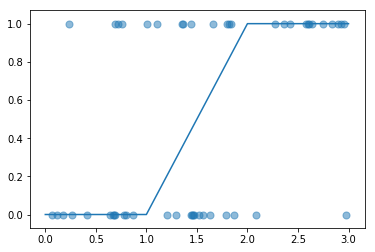

In [8]:
hypothesis = lambda x: 1 / (1 + (np.exp(-(x * theta[1] + x * theta[2]+ theta[0]))))

plt.plot([i for i in range(0,4)],[hypothesis(i) for i in range(0,4)])

plt.scatter([i[1] for i in x], y, s=50, alpha = 0.5)
plt.show()

## Decision boundaries for X[1] vs X[2] and X[1] vs X[0] respectively for Batch GD

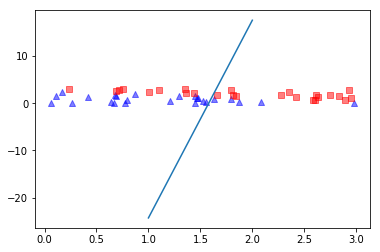

In [9]:
d_boundary_plot = lambda x: x*theta[1] + x*theta[2] + theta[0]
plt.plot([i for i in range(1,3)],[d_boundary_plot(i) for i in range(1,3)])

#plt.scatter([i[1] for i in x], [i[2] for i in x], s=50, alpha = 0.5)

for label,marker,color in zip(range(0,2),('^', 's'),('blue', 'red')):

        plt.scatter(x=x[:,1].real[y == label],
                y=x[:,2].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5
                )


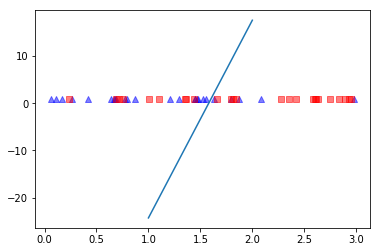

In [10]:
d_boundary_plot = lambda x: x*theta[1] + x*theta[2] + theta[0]
plt.plot([i for i in range(1,3)],[d_boundary_plot(i) for i in range(1,3)])

#plt.scatter([i[1] for i in x], [i[2] for i in x], s=50, alpha = 0.5)

for label,marker,color in zip(range(0,2),('^', 's'),('blue', 'red')):

        plt.scatter(x=x[:,1].real[y == label],
                y=x[:,0].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5
                )



In [11]:
def gradientDescentSto(x, y, theta, alpha, m, numIterations, delta=2, conv=0.00000001):

    xTrans = x.transpose()
    count = 0
    theta_prev = theta + delta + 1
    
    while (count < numIterations):
            
            count += 1

            for i in range(m):

                hypothesis = x[i][0]*theta[0] + x[i][1]*theta[1] + x[i][2]*theta[2]
                
                loss = 1/(1 + np.exp(- hypothesis)) - y[i]
                
                #loss = hypothesis - y[i]

                gradient1 = x[i][0] * loss
                gradient0 = x[i][1] * loss

                theta_prev = theta
                theta[1] = theta[1] - alpha * gradient0
                theta[0] = theta[0] - alpha * gradient1
                                
        
    return theta

In [12]:
theta = gradientDescentSto(x, y, theta, 0.08, m, 10000)

In [13]:
theta

array([-65.34984189,  20.63300455,  21.32420216])

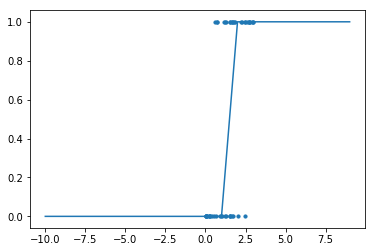

In [14]:
hypothesis = lambda x: 1 / (1 + (np.exp(-(x * theta[1] + x * theta[2] + theta[0]))))

plt.plot([i for i in range(-10,10)],[hypothesis(i) for i in range(-10,10)])
plt.scatter([i[2] for i in x], y, s=10)
plt.show()

## Decision boundaries for X[1] vs X[2] and X[1] vs X[0] respectively for Stochastic GD

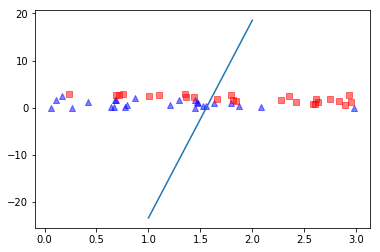

In [15]:
d_boundary_plot = lambda x: x*theta[1] + x*theta[2] + theta[0]
plt.plot([i for i in range(1,3)],[d_boundary_plot(i) for i in range(1,3)])

#plt.scatter([i[1] for i in x], [i[2] for i in x], s=50, alpha = 0.5)

for label,marker,color in zip(range(0,2),('^', 's'),('blue', 'red')):

        plt.scatter(x=x[:,1].real[y == label],
                y=x[:,2].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5
                )



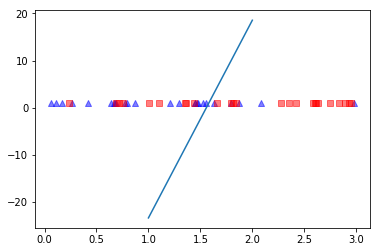

In [16]:
d_boundary_plot = lambda x: x*theta[1] + x*theta[2] + theta[0]
plt.plot([i for i in range(1,3)],[d_boundary_plot(i) for i in range(1,3)])

#plt.scatter([i[1] for i in x], [i[2] for i in x], s=50, alpha = 0.5)

for label,marker,color in zip(range(0,2),('^', 's'),('blue', 'red')):

        plt.scatter(x=x[:,1].real[y == label],
                y=x[:,0].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5
                )




In [17]:
d_boundary = lambda x: x[1]*theta[1] + x[2]*theta[2] + theta[0] * x[0]
y_hat = [1 if i > 0 else 0 for i in [d_boundary(i) for i in x]]

In [18]:
accuracy_score(y, y_hat)

1.0

## Linear discriminant analysis

In [19]:
x_old = x
x = x[:, 1:]

In [20]:
mean_vs = []
y_temp = np.array([1 if i > 0.5 else 0 for i in y])
for i in range(0,2):mean_vs.append(np.mean(x[y_temp==i], axis = 0))
print(mean_vs)
    


[array([1.11687638, 0.83202265]), array([1.90450382, 1.97216123])]


In [21]:
within_class = np.zeros((2,2))

for cl,mv in zip(range(0,2), mean_vs):
    
    class_scatter_matrix = np.zeros((2,2))                    
    for row in x[y_temp == cl]: 
        row, mv = row.reshape(2,1), mv.reshape(2,1)
        class_scatter_matrix += (row-mv).dot((row-mv).T)
    within_class += class_scatter_matrix                             

within_class

array([[ 28.46191249, -14.49320429],
       [-14.49320429,  26.81805413]])

In [22]:
mean = np.mean(x, axis=0)
between_class = np.zeros((2,2))

for i,mean_vec in enumerate(mean_vs):  
    n = x[y_temp==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(2,1)
    overall_mean = mean.reshape(2,1) 
    between_class += n * (mean_vec - mean).dot((mean_vec - mean).T)

between_class

array([[ 5.91092904, 10.74652962],
       [10.74652962, 19.63921255]])

In [23]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(within_class).dot(between_class))
for i in range(len(eig_vals)): eigvec_sc = eig_vecs[:,i].reshape(2,1)
print(eig_vals, eig_vecs)

[0.00058142 1.85935676] [[-0.87693265 -0.6255713 ]
 [ 0.48061328 -0.780167  ]]


In [29]:
eig_pairs = sorted([(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
                   , key=lambda k: k[0], reverse=True)
eig_pairs 


[(1.859356764932039, array([-0.6255713, -0.780167 ])),
 (0.0005814232087433258, array([-0.87693265,  0.48061328]))]

In [33]:
W = eig_pairs[0][1].reshape(2,1)
x_lda = x.dot(W)

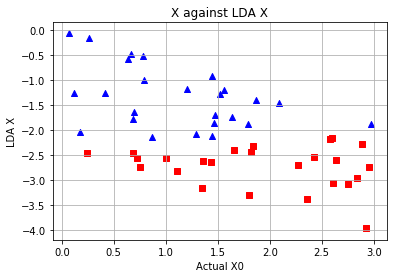

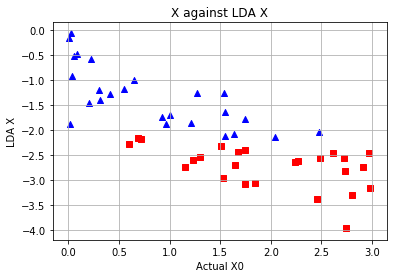

In [41]:
from matplotlib import pyplot as plt

def plot_step_lda(feature):

    ax = plt.subplot(111)
    for label,marker,color in zip(range(0,2),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=x[:,feature].real[y == label],
                y=x_lda[:,0].real[y == label],
                marker=marker, color=color)

    plt.xlabel('Actual X0')
    plt.ylabel('LDA X')
    plt.title('X against LDA X')
   
    
    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda(0)
plot_step_lda(1)



## The above plot shows the relationship between actual X and LDA transformed X. Both X0 and X1 are shown to be linearly seperated at X ~ 2.0 

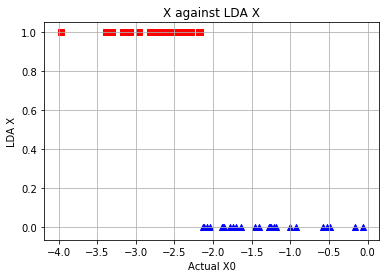

In [42]:
ax = plt.subplot(111)
for label,marker,color in zip(range(0,2),('^', 's'),('blue', 'red')): plt.scatter(x=x_lda[:,0].real[y == label],y=y.real[y == label],marker=marker,color=color)

plt.xlabel('Actual X0')
plt.ylabel('LDA X')
plt.title('X against LDA X')


plt.grid()
plt.tight_layout
plt.show()




## There is a clean seperation once LDA is applied to X

In [584]:
y_hat = [1 if i>=2 else 0 for i in x_lda]
accuracy_score(y, y_hat)

0.96

## Histograms of the three methods

(array([ 4.,  1.,  7.,  8.,  6., 11.,  6.,  5.,  1.,  1.]),
 array([0.5  , 0.528, 0.556, 0.584, 0.612, 0.64 , 0.668, 0.696, 0.724,
        0.752, 0.78 ]),
 <a list of 10 Patch objects>)

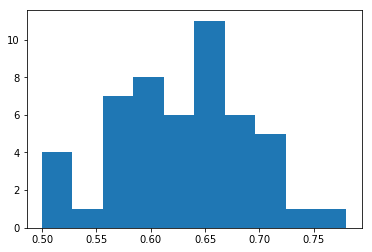

In [609]:
accuracies_gd = []

for run in range(50):

    x,y = (genData(50))
    m, n = np.shape(x) 
    theta = gradientDescent(x,y, np.ones(n), 1, m, 70000)

    d_boundary = lambda x: x[0]*theta[1] + x[1]*theta[2] + x[2]*theta[0]


    y_hat = [0 if i > 0 else 1 for i in [d_boundary(i) for i in x]]
    accuracies_gd.append(accuracy_score(y, y_hat))
    
plt.hist(np.array(accuracies_gd), label = 'GD')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


(array([2., 0., 2., 1., 1., 1., 7., 2., 2., 2.]),
 array([0.5  , 0.526, 0.552, 0.578, 0.604, 0.63 , 0.656, 0.682, 0.708,
        0.734, 0.76 ]),
 <a list of 10 Patch objects>)

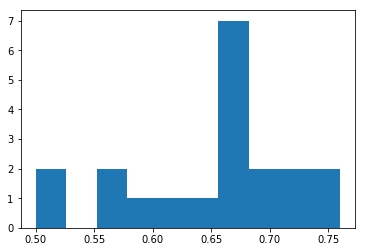

In [620]:
accuracies_sto = []

for run in range(20):
    
    print (run)
    x,y = (genData(50))
    m, n = np.shape(x) 
    theta = gradientDescentSto(x,y, np.ones(n), 1, m, 10000)

    d_boundary = lambda x: x[0]*theta[1] + x[1]*theta[2] + x[2]*theta[0]


    y_hat = [0 if i > 0 else 1 for i in [d_boundary(i) for i in x]]
    accuracies_sto.append(accuracy_score(y, y_hat))
    
plt.hist(np.array(accuracies_sto), label = 'GD')

[array([0.83929704, 1.00614434]), array([2.26066898, 1.98306645])]
[array([1.06232932, 1.05398051]), array([1.69221586, 2.20116009])]
[array([0.8595049 , 1.12125005]), array([1.90860151, 2.04333948])]
[array([0.66273389, 1.12640724]), array([2.0469637 , 1.79945824])]
[array([1.39749888, 0.72031956]), array([1.97557825, 1.95054578])]
[array([1.16347381, 1.01042746]), array([2.07469372, 1.86183587])]
[array([0.98200943, 0.92036327]), array([1.80268477, 2.2628307 ])]
[array([1.13439717, 1.09243617]), array([2.17336398, 2.28375346])]
[array([1.25256252, 0.97733217]), array([1.93141848, 2.28168542])]
[array([0.84419823, 0.91675769]), array([2.26498206, 1.89756332])]
[array([0.73760576, 1.41559017]), array([2.01185166, 1.8043372 ])]
[array([1.19567031, 0.6815785 ]), array([2.25383607, 1.77951421])]
[array([1.13134132, 1.07579967]), array([1.98603291, 1.97414516])]
[array([1.08014185, 0.9773905 ]), array([2.1687166 , 2.05693904])]
[array([0.92437414, 1.27888806]), array([1.77244258, 2.2045158

[array([0.99451224, 0.95653145]), array([2.03035393, 1.74496909])]
[array([1.15371399, 0.80932965]), array([2.00920047, 2.11132994])]
[array([0.99022561, 0.97838969]), array([2.04766283, 2.02273148])]
[array([1.13103245, 0.90147812]), array([2.11791168, 1.77349256])]
[array([0.89622563, 0.93380054]), array([2.08828548, 1.76894305])]
[array([1.04015909, 1.14587093]), array([2.09137075, 1.88276824])]
[array([0.61485077, 1.4053672 ]), array([2.08450327, 2.0320207 ])]
[array([0.95788838, 1.10641587]), array([2.00883901, 2.0681884 ])]
[array([1.09311754, 0.93554341]), array([2.05146156, 2.1121795 ])]
[array([1.0058557 , 1.21992646]), array([1.58025075, 2.09007811])]
[array([0.7863716 , 1.01655771]), array([2.09302648, 1.86646201])]
[array([0.80052404, 1.22684253]), array([1.99549724, 2.04560022])]
[array([0.83376376, 1.07891748]), array([2.07251111, 2.00163969])]
[array([0.88152574, 1.03048357]), array([1.85380017, 2.13225989])]
[array([0.83457479, 1.0717429 ]), array([2.03430186, 1.9940711

(array([ 9., 18., 32., 24.,  4.,  2.,  0.,  0., 26., 85.]),
 array([0.34 , 0.406, 0.472, 0.538, 0.604, 0.67 , 0.736, 0.802, 0.868,
        0.934, 1.   ]),
 <a list of 10 Patch objects>)

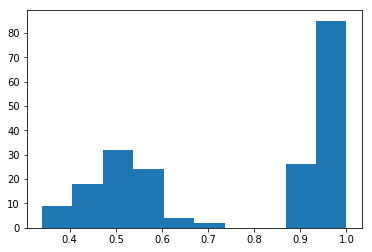

In [45]:
accuracies_lda = []

for run in range(200):
    
    x,y = (genData(50))
    x = x[:, 1:]

    mean_vs = []
    y_temp = np.array([1 if i > 0.5 else 0 for i in y])
    for i in range(0,2):mean_vs.append(np.mean(x[y_temp==i], axis = 0))
    print(mean_vs)
    
    within_class = np.zeros((2,2))

    for cl,mv in zip(range(0,2), mean_vs):

        class_scatter_matrix = np.zeros((2,2))                    
        for row in x[y_temp == cl]: 
            row, mv = row.reshape(2,1), mv.reshape(2,1)
            class_scatter_matrix += (row-mv).dot((row-mv).T)
        within_class += class_scatter_matrix                             


    overall_mean = np.mean(x, axis=0)
    
    mean = np.mean(x, axis=0)
    between_class = np.zeros((2,2))

    for i,mean_vec in enumerate(mean_vs):  
        n = x[y_temp==i+1,:].shape[0]
        mean_vec = mean_vec.reshape(2,1)
        overall_mean = mean.reshape(2,1) 
        between_class += n * (mean_vec - mean).dot((mean_vec - mean).T)

    eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(within_class).dot(between_class))
    for i in range(len(eig_vals)): eigvec_sc = eig_vecs[:,i].reshape(2,1)
        
    eig_pairs = sorted([(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
                   , key=lambda k: k[0], reverse=True)
        

    W = eig_pairs[0][1].reshape(2,1)
    x_lda = x.dot(W)
   
    y_hat = [1 if i>=2 else 0 for i in x_lda]
    accuracies_lda.append(accuracy_score(y, y_hat))

plt.hist(np.array(accuracies_lda), label = 'GD')